<a href="https://colab.research.google.com/github/te19oishi/colab/blob/main/Convolve2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.ndimage.filters as sfil
import cv2
import cis

In [ ]:
!pip install simpleaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ss.convolve2d([[1,2],[3,4]],[[5,6],[7,8]])

array([[ 5, 16, 12],
       [22, 60, 40],
       [21, 52, 32]])

In [ ]:
np.convolve([1,2],[5,6])

array([ 5, 16, 12])

In [ ]:
G=np.uint8(180*np.ones((256,256)))
for k in np.arange(31,256,32):
  G[:,k-2:k]=50
  G[k-2:k,:]=60
fG=np.uint8(ss.convolve2d(np.double(G),np.ones((3,1))/3))
fG.shape

(258, 256)

In [ ]:
fG=fG[1:-1,:]
fG.shape

(256, 256)

In [ ]:
G

array([[180, 180, 180, ...,  50,  50, 180],
       [180, 180, 180, ...,  50,  50, 180],
       [180, 180, 180, ...,  50,  50, 180],
       ...,
       [ 60,  60,  60, ...,  60,  60,  60],
       [ 60,  60,  60, ...,  60,  60,  60],
       [180, 180, 180, ...,  50,  50, 180]], dtype=uint8)

In [ ]:
fG

array([[120, 120, 120, ...,  33,  33, 120],
       [180, 180, 180, ...,  49,  49, 180],
       [180, 180, 180, ...,  49,  49, 180],
       ...,
       [100, 100, 100, ...,  56,  56, 100],
       [100, 100, 100, ...,  56,  56, 100],
       [ 80,  80,  80, ...,  36,  36,  80]], dtype=uint8)

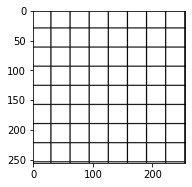

In [ ]:
plt.subplot(1,2,1); plt.imshow(G, cmap='gray')

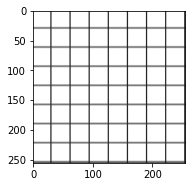

In [ ]:
plt.subplot(1,2,2); plt.imshow(fG, cmap='gray')

In [ ]:
np.ones((3,1))/3

array([[0.33333333],
       [0.33333333],
       [0.33333333]])

In [ ]:
np.ones((1,3))/3

array([[0.33333333, 0.33333333, 0.33333333]])

In [ ]:
np.ones((3,3))/3

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

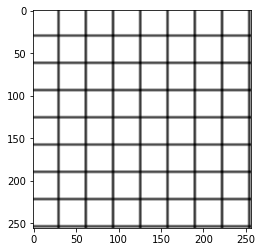

In [ ]:
fG=sfil.convolve(G,np.ones((3,3))/9)
plt.imshow(fG,cmap='gray')
plt.show()

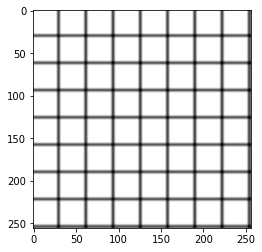

In [ ]:
plt.imshow(sfil.uniform_filter(fG,3),cmap='gray')

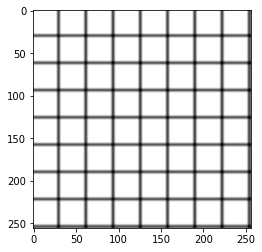

In [ ]:
plt.imshow(sfil.uniform_filter(fG,3),cmap='gray')

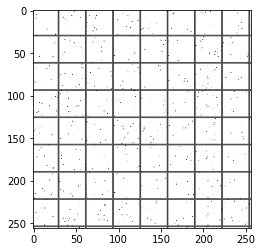

In [ ]:
N=np.random.poisson(0.01,G.shape)*np.random.standard_normal(G.shape)*80
NG=cv2.subtract(G,np.uint8(N))
plt.imshow(NG,cmap='gray')

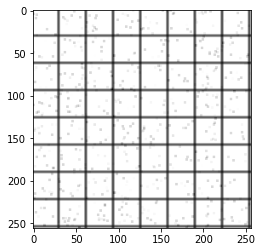

In [ ]:
fNG=sfil.uniform_filter(NG,3)
plt.imshow(fNG,cmap='gray')
plt.show()

In [ ]:
G=cv2.imread('redpepper.jpg',0)
cis.mesh(G)

In [ ]:
ss.convolve2d([[1],
               [2],
               [1]],[[1,0,-1]])

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

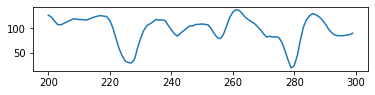

In [ ]:
G=cv2.imread('rose.jpeg',0)
y=G[300,:]
y1=ss.lfilter([1,0,-1],1,np.double(y))
y2=ss.lfilter([1,-2,1],1,np.double(y))
r=np.arange(200,300)
plt.subplot(311); plt.plot(r,y[r])